In [23]:
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

import sklearn

In [24]:
sklearn.metrics.accuracy_score( [1,], [2])

0.0

In [2]:
digits = datasets.load_digits()

In [3]:
digits.data.shape

(1797, 64)

In [4]:
example = digits.data[223].reshape(8,8)
example

array([[ 0.,  0.,  0.,  8., 12.,  1.,  0.,  0.],
       [ 0.,  0.,  1., 15., 12.,  1.,  0.,  0.],
       [ 0.,  0.,  6., 16.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 16.,  1.,  0.,  0.,  0.],
       [ 0.,  1., 16., 16., 14.,  5.,  0.,  0.],
       [ 0.,  1., 12., 16.,  6., 14.,  9.,  0.],
       [ 0.,  0.,  2., 16.,  6., 10., 15.,  0.],
       [ 0.,  0.,  0.,  6., 16., 16., 11.,  0.]])

6

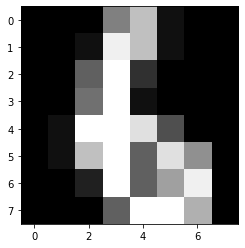

In [5]:
plt.imshow( example , cmap='gray', vmin=0) 
digits.target[223]

In [6]:
X = digits.data
y = digits.target

X[0]


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

## Steps 

- Feature engineering
- Train/Validation/Test splits
- Fit the model 
- Evaluate the model 

In [28]:
X = StandardScaler().fit_transform(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1437, 64), (1437,), (360, 64), (360,))

In [30]:
X_train[0]

array([ 0.        , -0.33501649, -0.46382335,  0.50949529, -2.53093486,
       -1.02065685, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
        0.29847085,  0.00517797, -2.14988554, -1.35109507, -0.51499146,
       -0.13043338, -0.04462507,  0.11144272,  1.07165259, -0.17113561,
       -1.14964846, -1.25998248, -0.54880546, -0.11422184, -0.03337973,
        0.80438791,  1.11605583, -1.15984045, -1.61406277, -1.28625035,
       -0.62889588, -0.04723238,  0.        ,  1.05206109,  1.31786694,
       -1.12848011, -0.89375551, -1.14908874, -0.82269451,  0.        ,
       -0.06134367,  0.8105536 ,  1.39509519, -0.8118781 ,  0.69158323,
        1.18784054, -0.33635139, -0.08874162, -0.03543326,  0.16927197,
        1.15065212,  0.66228542, -1.39914105,  0.70346305,  1.47922891,
       -0.20978513, -0.02359646, -0.29908135, -0.5013322 , -0.24900951,
        0.84963214,  1.05712311,  0.47246651, -0.19600752])

In [31]:
model = LogisticRegression()


In [33]:
#model.coef_.shape

In [34]:
model.fit(  X_train, y_train )

LogisticRegression()

(1, 64)

In [35]:
predictions = model.predict( X_test )


In [36]:
accuracy_score( y_test, predictions )

0.9722222222222222

## What happened here? 

- A warning is raised from the optimiser: **"STOP: TOTAL NO. of ITERATIONS REACHED LIMIT."**
- original pixel values are in the range $ [0..16] $ 
- optimisation algorithms work best when the data have zero mean (and sometimes unit variance)
- so we will apply standard scaling to the input data $$ z = \frac{x - u}{  s } $$

where u is the mean of the training samples and s is the standard deviation of the training samples  

In [11]:
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

model.fit(  X_train, y_train )

LogisticRegression()

In [12]:
X[0]

array([ 0.        , -0.33501649, -0.04308102,  0.27407152, -0.66447751,
       -0.84412939, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
        0.4829745 ,  0.75962245, -0.05842586,  1.12772113,  0.87958306,
       -0.13043338, -0.04462507,  0.11144272,  0.89588044, -0.86066632,
       -1.14964846,  0.51547187,  1.90596347, -0.11422184, -0.03337973,
        0.48648928,  0.46988512, -1.49990136, -1.61406277,  0.07639777,
        1.54181413, -0.04723238,  0.        ,  0.76465553,  0.05263019,
       -1.44763006, -1.73666443,  0.04361588,  1.43955804,  0.        ,
       -0.06134367,  0.8105536 ,  0.63011714, -1.12245711, -1.06623158,
        0.66096475,  0.81845076, -0.08874162, -0.03543326,  0.74211893,
        1.15065212, -0.86867056,  0.11012973,  0.53761116, -0.75743581,
       -0.20978513, -0.02359646, -0.29908135,  0.08671869,  0.20829258,
       -0.36677122, -1.14664746, -0.5056698 , -0.19600752])

In [13]:
ret = model.predict(X_test)

In [15]:
accuracy_score( y_test, ret )

0.9722222222222222

In [38]:
model

LogisticRegression()

In [39]:
from joblib import dump, load
dump(model, '/logistic_v1.joblib') 


['logistic_v1.joblib']

In [40]:

clf = load('logistic_v1.joblib') 

In [41]:
clf

LogisticRegression()

In [44]:
!ks

/bin/bash: ks: command not found
